In [1]:
cd D:\Sabudh\Data

D:\Sabudh\Data


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv('data_1024.csv',delimiter='\t')[['Distance_Feature','Speeding_Feature']]

In [4]:
data.head()

,Distance_Feature,Speeding_Feature
0,71.24,28.0
1,52.53,25.0
2,64.54,27.0
3,55.69,22.0
4,54.58,25.0


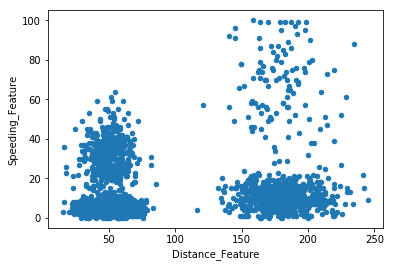

In [5]:
data.plot(x='Distance_Feature',y='Speeding_Feature',kind='scatter')

In [6]:
data.shape

(4000, 2)


# vectorised way with numpy

In [7]:
k=4
centroids=np.array(data.sample(n=k))
x1=np.array(data)

In [8]:
centroids

array([[65.88,  8.  ],
       [62.91,  7.  ],
       [74.91,  4.  ],
       [44.38,  5.  ]])

In [9]:
for i in range(1000):
    x2=centroids[:,np.newaxis,:]
    distance=np.sqrt(np.sum(np.square(x2-x1),axis=2))
    c_index=np.argmin(distance,axis=0)
    for i in range(k):
        centroids[i]=np.mean(x1[np.where(c_index==i)],axis=0)
    

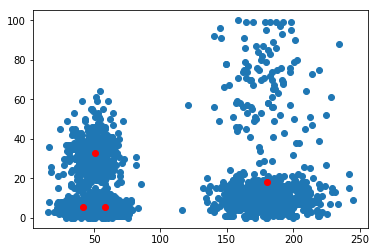

In [10]:
plt.scatter(x=data['Distance_Feature'],y=data['Speeding_Feature'],data=data)    
for i in range(k):
    plt.scatter(centroids[i][0],centroids[i][1],c='r')

# with sklearn

In [18]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=4, random_state=0).fit(x1)


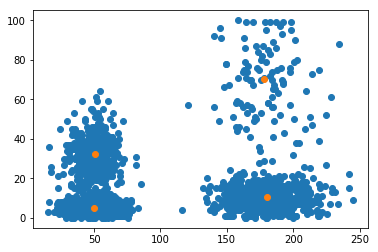

In [23]:
plt.scatter(x=data['Distance_Feature'],y=data['Speeding_Feature'],data=data)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],)

# using for loop

In [88]:
for i in range(1000):
    dist=[]
    for i in centroids:
        for j in x1:
            dist.append((i-j)**2)
    dist=np.sum(np.array(dist)**2,axis=1).reshape(4,len(x1))
    index=np.argmin(dist,axis=0)
    for i in range(k):
        centroids[i]=np.mean(x1[np.where(index==i)],axis=0)

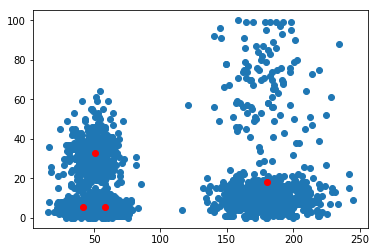

In [89]:
plt.scatter(x=data['Distance_Feature'],y=data['Speeding_Feature'],data=data)    
for i in range(k):
    plt.scatter(centroids[i][0],centroids[i][1],c='r')

# ++ approach

In [18]:
k=2
x1=np.array(data)
c1=np.min(x1,axis=0)
c2=x1[np.argmax(np.sum(np.square(x1-c1),axis=1))]
cent=np.array([c1,c2])

In [19]:
c=[[],[]]
x2=cent[:,np.newaxis,:]
distance=np.sqrt(np.sum(np.square(x2-x1),axis=2))
c_index=np.argmin(distance,axis=0)
for i in range(k):
    c[i]=(x1[np.where(c_index==i)])
    
c3=x1[np.argmax(np.sum(np.square(c[0]-c1),axis=1))]
c4=x1[np.argmax(np.sum(np.square(c[1]-c2),axis=1))]
centroid=np.array([c1,c2,c3,c4])
centroid

array([[ 15.52,   0.  ],
       [234.52,  88.  ],
       [199.81,  32.  ],
       [ 30.37,  37.  ]])

In [20]:
s=4
for i in range(10000):
    x2=centroid[:,np.newaxis,:]
    distance=np.sqrt(np.sum(np.square(x2-x1),axis=2))
    c_index=np.argmin(distance,axis=0)
    for i in range(s):
        centroid[i]=np.mean(x1[np.where(c_index==i)],axis=0)
    

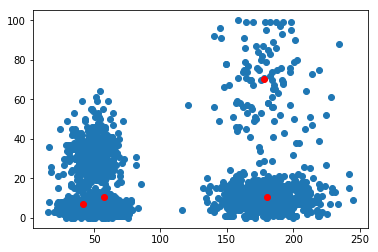

In [21]:
plt.scatter(x=data['Distance_Feature'],y=data['Speeding_Feature'],data=data)    
for i in range(s):
    plt.scatter(centroid[i][0],centroid[i][1],c='r')

In [22]:
centroid

array([[ 41.68474206,   7.07407407],
       [177.83509615,  70.28846154],
       [180.43486331,  10.5294964 ],
       [ 57.57352279,  10.39668443]])